In [ ]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette('cubehelix')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-1-d6d67089ecf5>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
!pip install pyfolio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88652 sha256=0cc0302ebc42fb07cfba3d69fade6a834e9c0215f9fa556d54dd93b2c302e3c3
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39756 sha256=dba0c95743acc5c69b177584860566ebf3ac0997fe8d18d43bda43dd286ed243
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


In [ ]:
import os

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf
import datetime as dt

/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
pf.__path__

['/usr/local/lib/python3.10/dist-packages/pyfolio']

In [ ]:
def get_user_risk_tolerance():
    while True:
        try:
            risk_tolerance = int(input("Please enter your risk tolerance level (1 to 5): "))
            if risk_tolerance < 1 or risk_tolerance > 5:
                raise ValueError
            break
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 5.")
    return risk_tolerance

user_risk_tolerance = get_user_risk_tolerance()
print("User's risk tolerance level:", user_risk_tolerance)

Please enter your risk tolerance level (1 to 5): 3
User's risk tolerance level: 3


In [ ]:
def get_user_stock_codes():
    while True:
        try:
            num_stock_codes = int(input("Please enter the number of stock codes you want to input (3 to 10): "))
            if num_stock_codes < 3 or num_stock_codes > 10:
                raise ValueError
            break
        except ValueError:
            print("Invalid input. Please enter a number between 3 and 10.")

    stock_codes = []
    for i in range(num_stock_codes):
        stock_code = input("Enter stock code {} of {}: ".format(i + 1, num_stock_codes))
        stock_codes.append(stock_code)

    return stock_codes

user_stock_codes = get_user_stock_codes()
print("User's preferred stock codes:", user_stock_codes)

Please enter the number of stock codes you want to input (3 to 10): 3
Enter stock code 1 of 3: AAPL
Enter stock code 2 of 3: MSFT
Enter stock code 3 of 3: MFC
User's preferred stock codes: ['AAPL', 'MSFT', 'MFC']


In [ ]:
data = yf.download(user_stock_codes, start='2016-01-01', end='2021-12-31', progress=False)
adj_close = data['Adj Close']

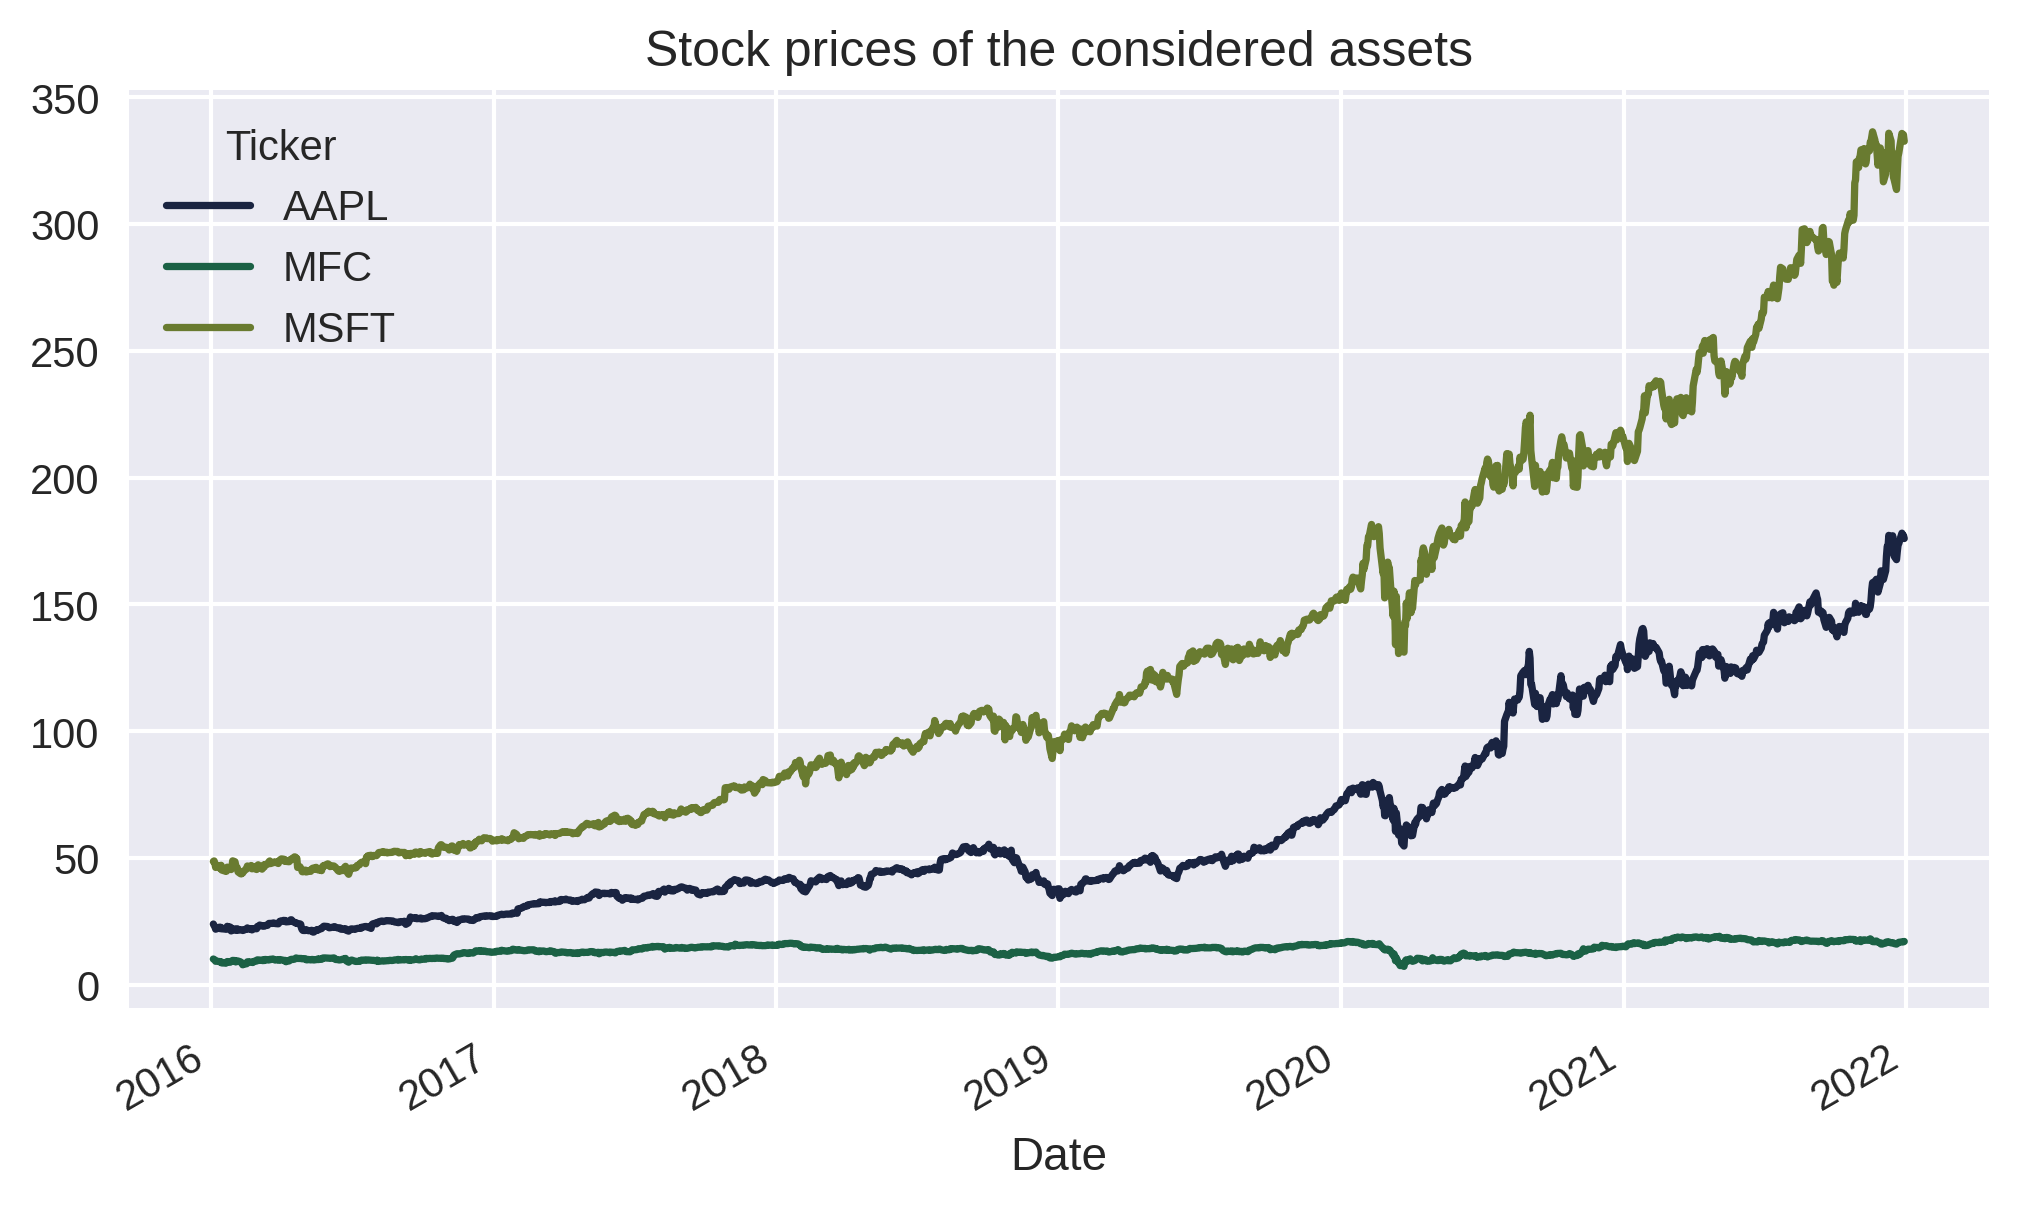

In [ ]:
data['Adj Close'].plot(title='Stock prices of the considered assets');

In [ ]:
Trading_days = 252
returns = np.log(data['Adj Close']/data['Adj Close'].shift(1))

In [ ]:
n_assets = len(user_stock_codes)

In [ ]:
portfolio_weights = n_assets * [1 / n_assets]
portfolio_weights

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [ ]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T),
                              index=returns.index)

In [ ]:
portfolio_returns

Date
2016-01-04         NaN
2016-01-05   -0.011986
2016-01-06   -0.022545
2016-01-07   -0.041511
2016-01-08    0.004022
                ...   
2021-12-23    0.007723
2021-12-27    0.018578
2021-12-28   -0.001340
2021-12-29   -0.000555
2021-12-30   -0.001794
Length: 1510, dtype: float64

<Axes: title={'center': 'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

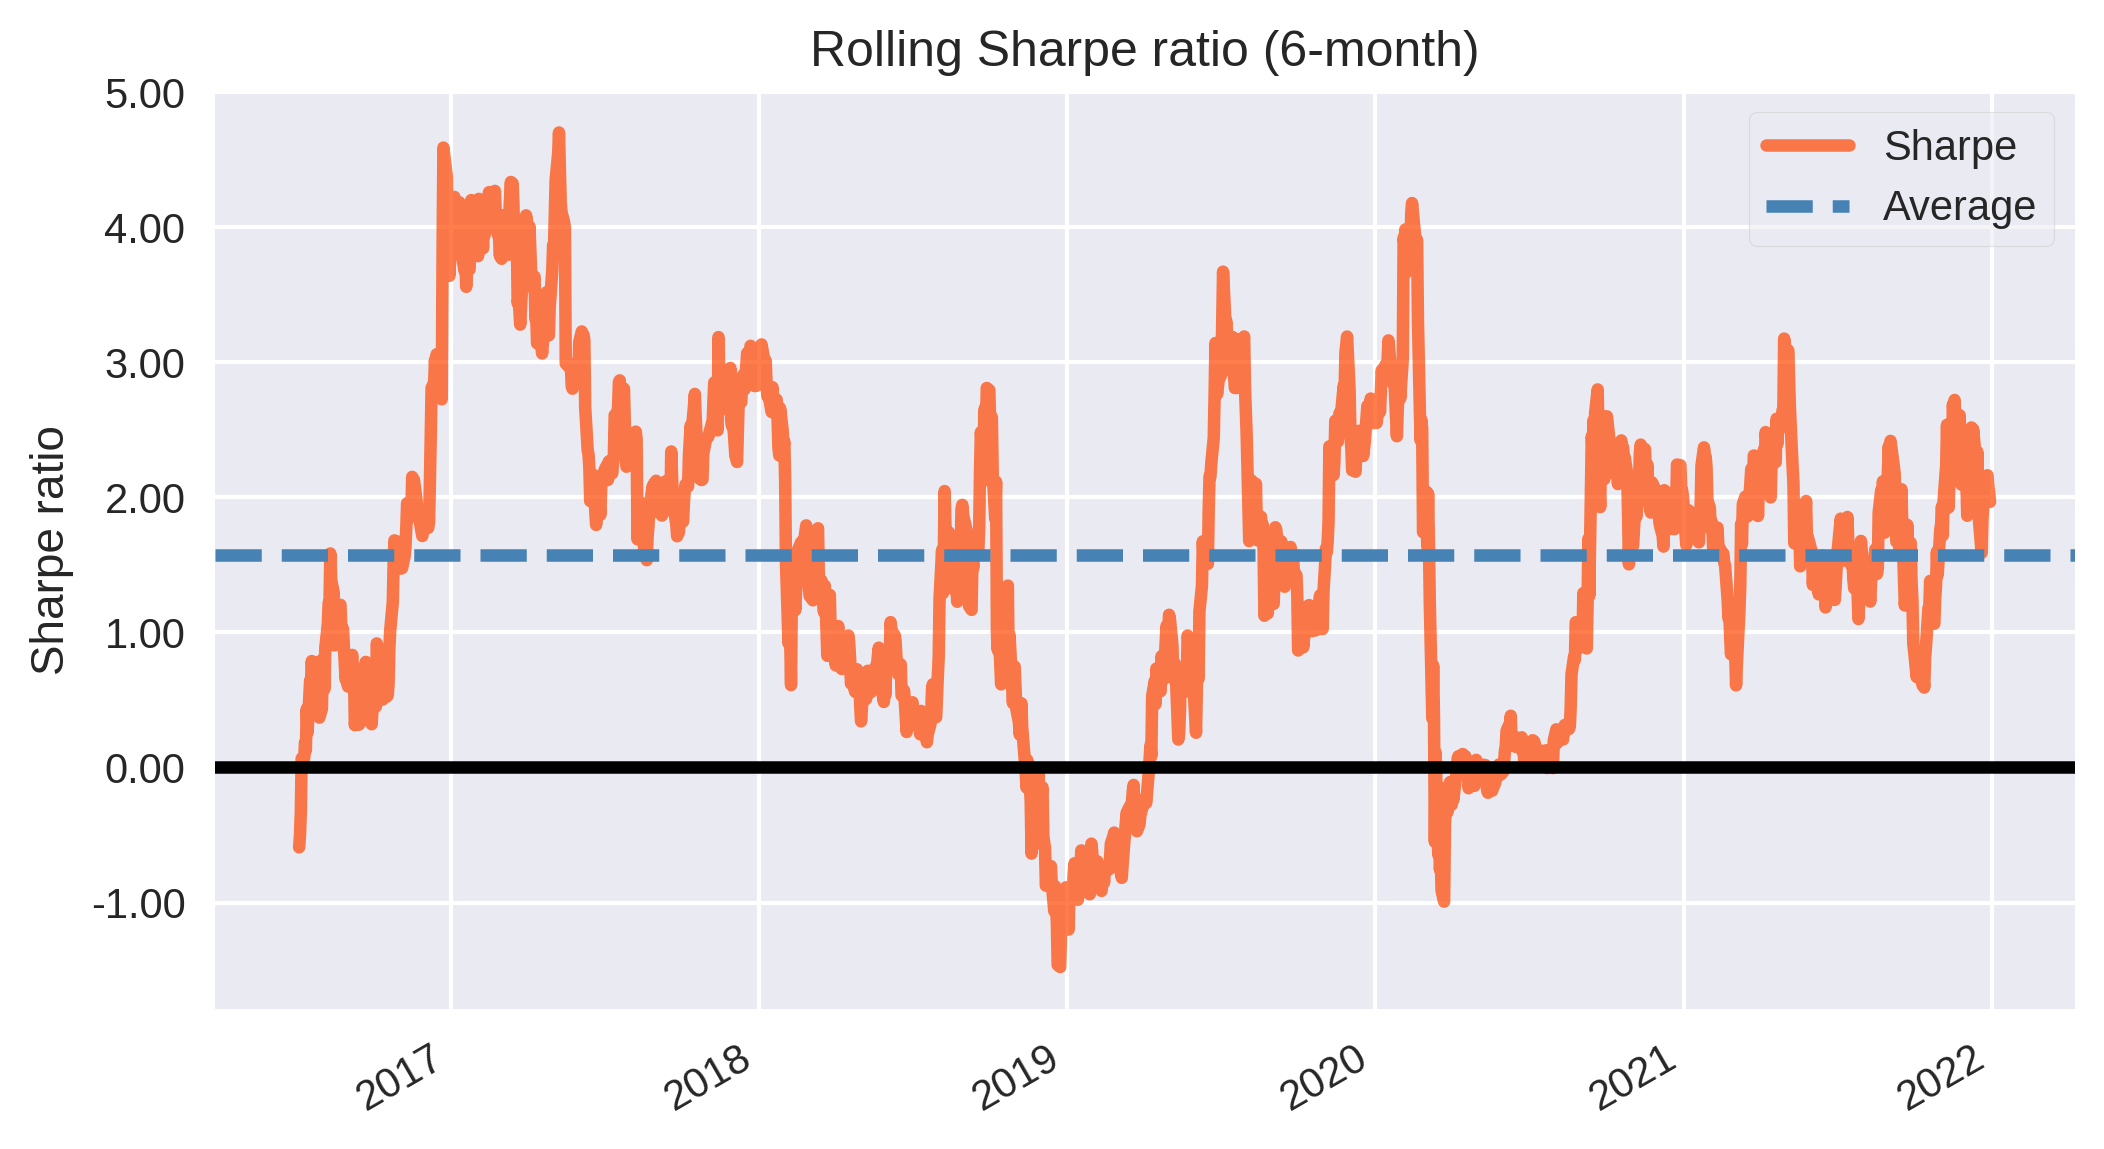

In [ ]:
pf.plot_rolling_sharpe(portfolio_returns)

In [ ]:
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=Trading_days).std()*np.sqrt(Trading_days)

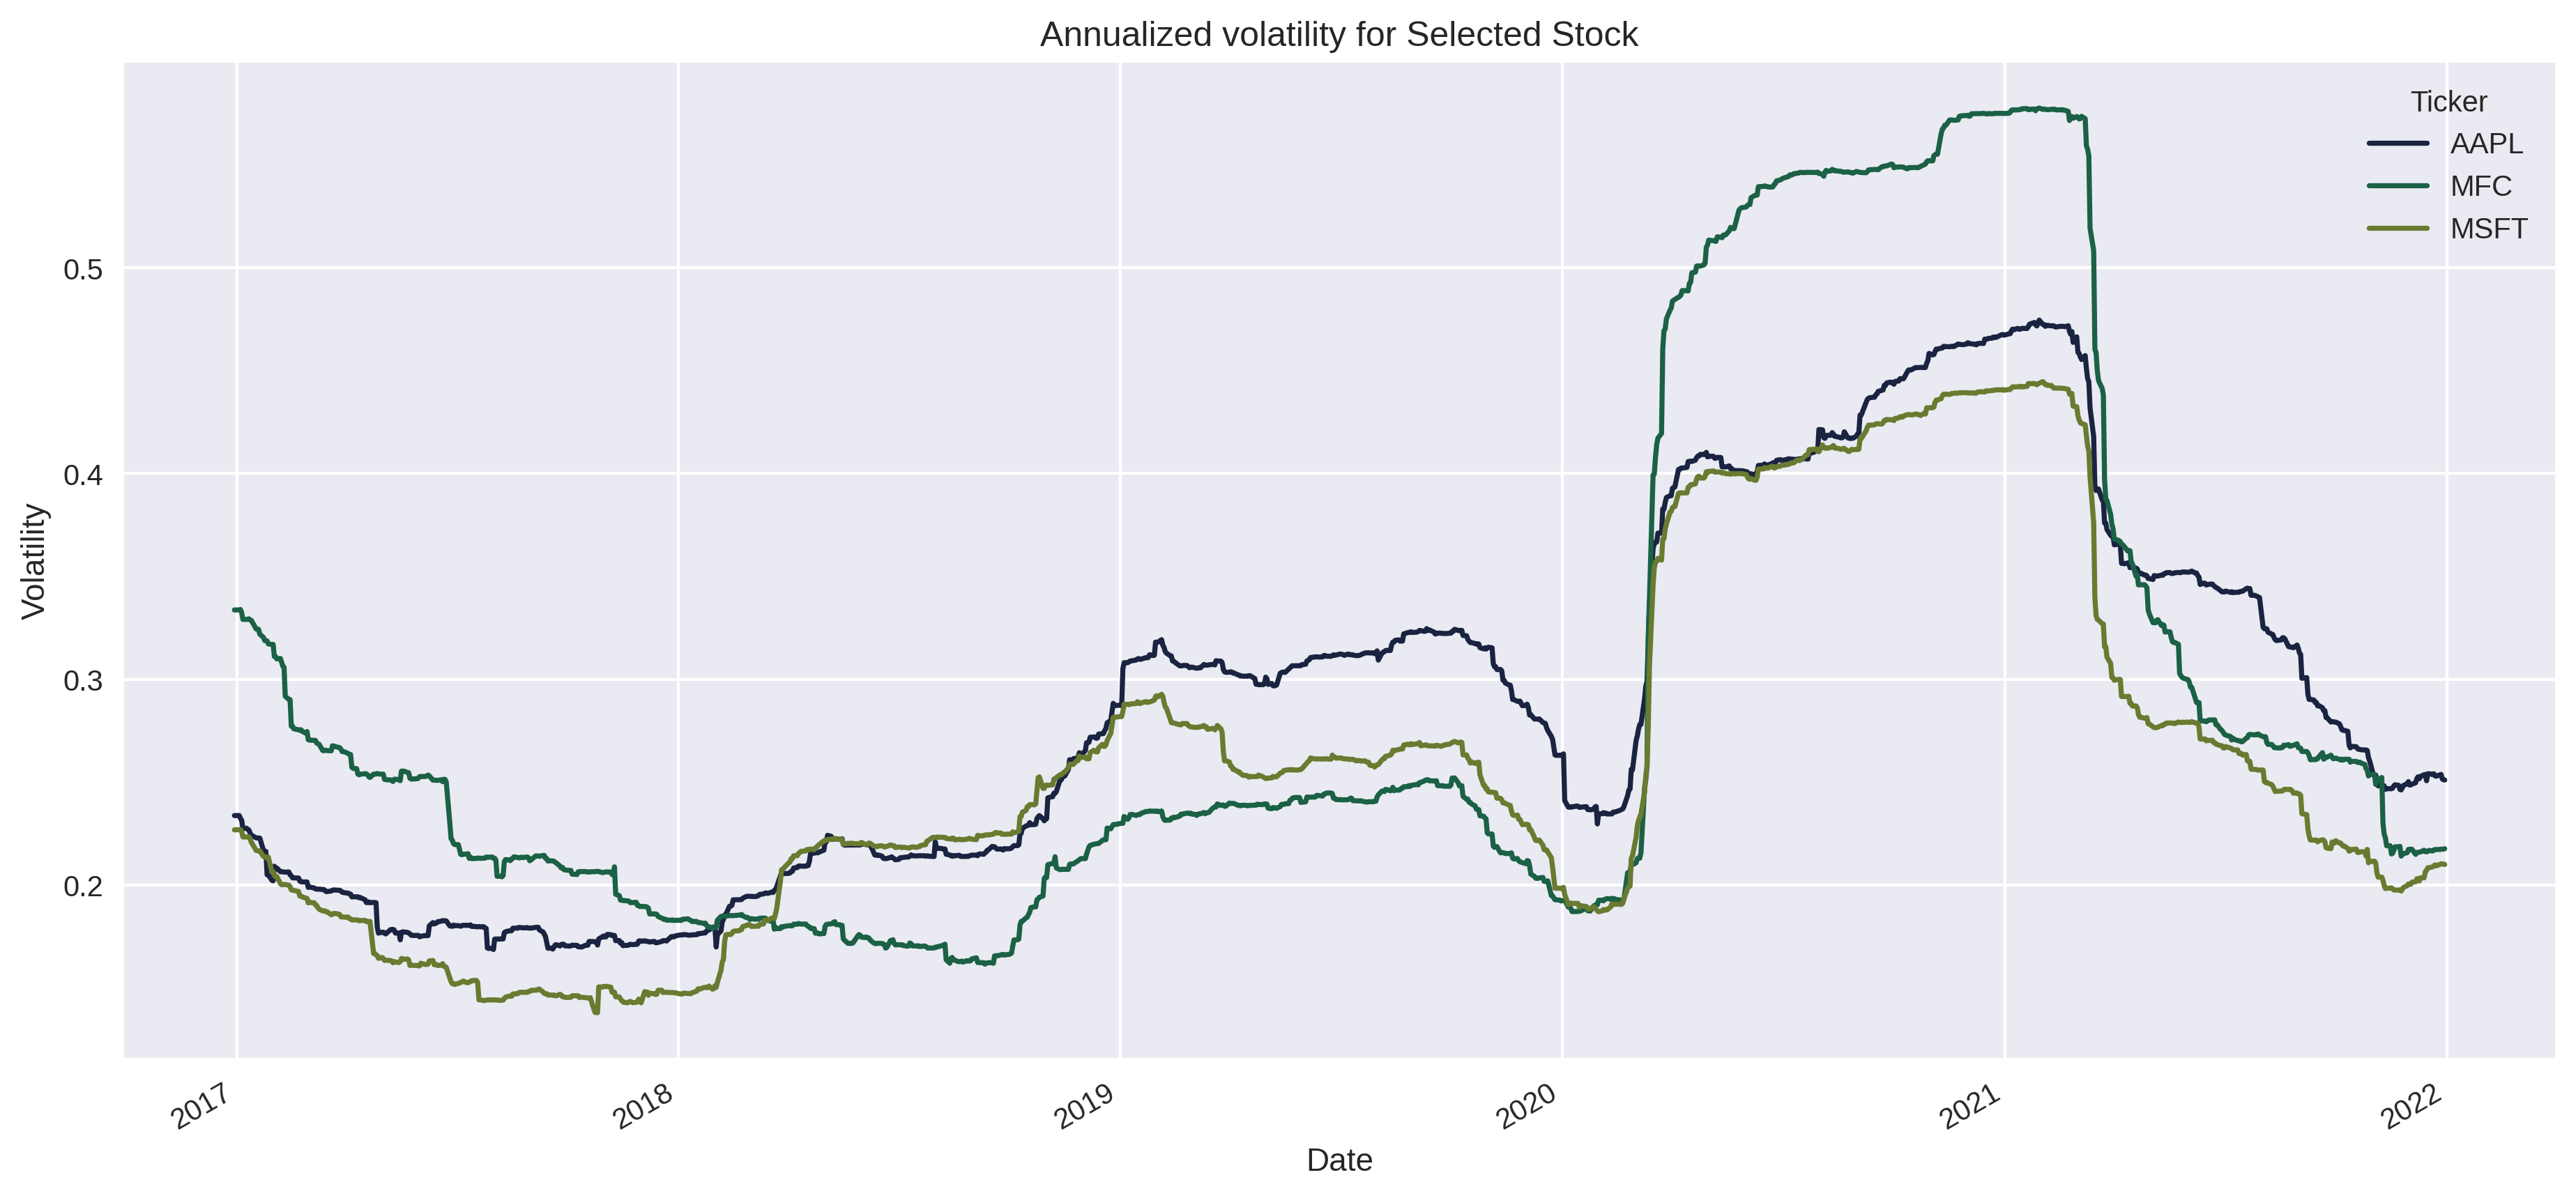

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for Selected Stock')
plt.show()

In [ ]:
log_returns = np.log(adj_close / adj_close.shift(1)).dropna()
volatility_2 = log_returns.std() * np.sqrt(252)

In [ ]:
volatility_df = pd.DataFrame({'Volatility': volatility_2})

In [ ]:
volatility_df = volatility_df.sort_values(by='Volatility')

In [ ]:
low_cutoff = 0.2
moderate_cutoff = 0.3
high_cutoff = 0.4

volatility_df['Risk Level'] = pd.cut(volatility_df['Volatility'], bins=[0, low_cutoff, moderate_cutoff, high_cutoff, float('inf')],
                                     labels=['Low', 'Moderate', 'High', 'Very High'], right=False)

In [ ]:
volatility_df

,Volatility,Risk Level
Ticker,,
MSFT,0.267652,Moderate
AAPL,0.294190,Moderate
MFC,0.319666,High


In [ ]:
N_PORTFOLIOS = 10 ** 5
user_stock_codes.sort()

In [ ]:
# calculate the simple returns
returns_df = data['Adj Close'].pct_change().dropna()
# annualize the metrics by multiplying them by 252 (the average number of trading days in a year)
# calculate the average (expected) annual return
avg_returns = returns_df.mean() * Trading_days
# calculate the covariance matrix
cov_mat = returns_df.cov() * Trading_days

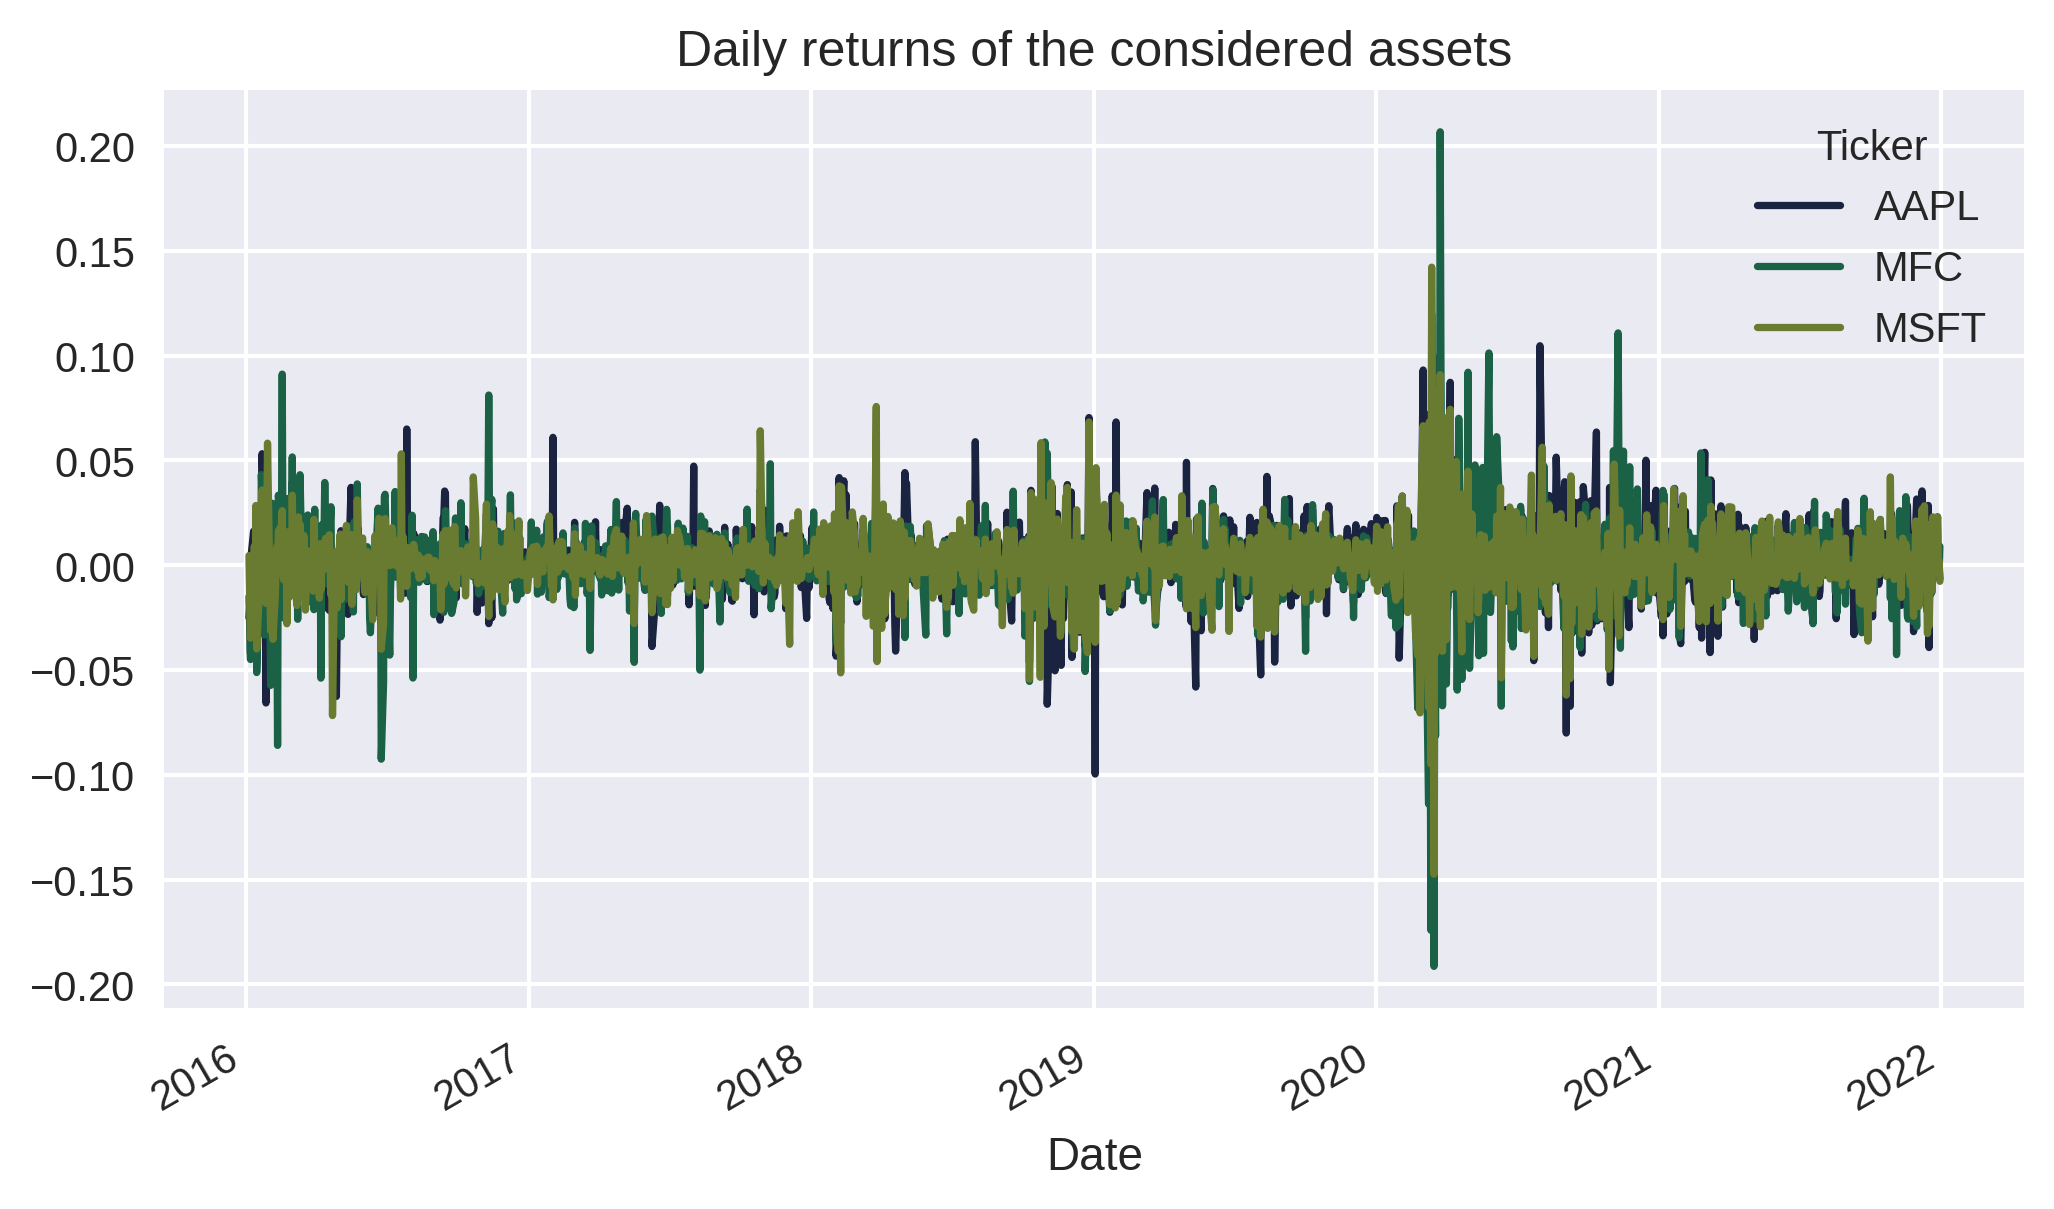

In [ ]:
returns_df.plot(title='Daily returns of the considered assets');

In [ ]:
np.random.seed(42)
# make the weights to be positive and sum up to 1
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [ ]:
weights

array([[0.18205878, 0.46212909, 0.35581214],
       [0.65738127, 0.17132261, 0.17129612],
       [0.03807826, 0.56784481, 0.39407693],
       ...,
       [0.15312135, 0.49415067, 0.35272797],
       [0.53306335, 0.06032037, 0.40661627],
       [0.45463344, 0.0345693 , 0.51079726]])

In [ ]:
# calculate the expected annual portfolio returns
portf_rtns = np.dot(weights, avg_returns)

# calculate the standard deviation, iterate over all the simulated portfolios
portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T,
                                    np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol # assume risk-free rate is 0%

In [ ]:
# put all the relevant metrics into a pandas DataFrame
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                 'volatility': portf_vol,
                                 'sharpe_ratio': portf_sharpe_ratio})

In [ ]:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

# create an array of expected returns from the sample
portf_rtns_ef = np.linspace(portf_results_df.returns.min(),
                            portf_results_df.returns.max(),
                            N_POINTS)
# round the numbers to two decimals
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    # find the minimum observable volatility for each expected return
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

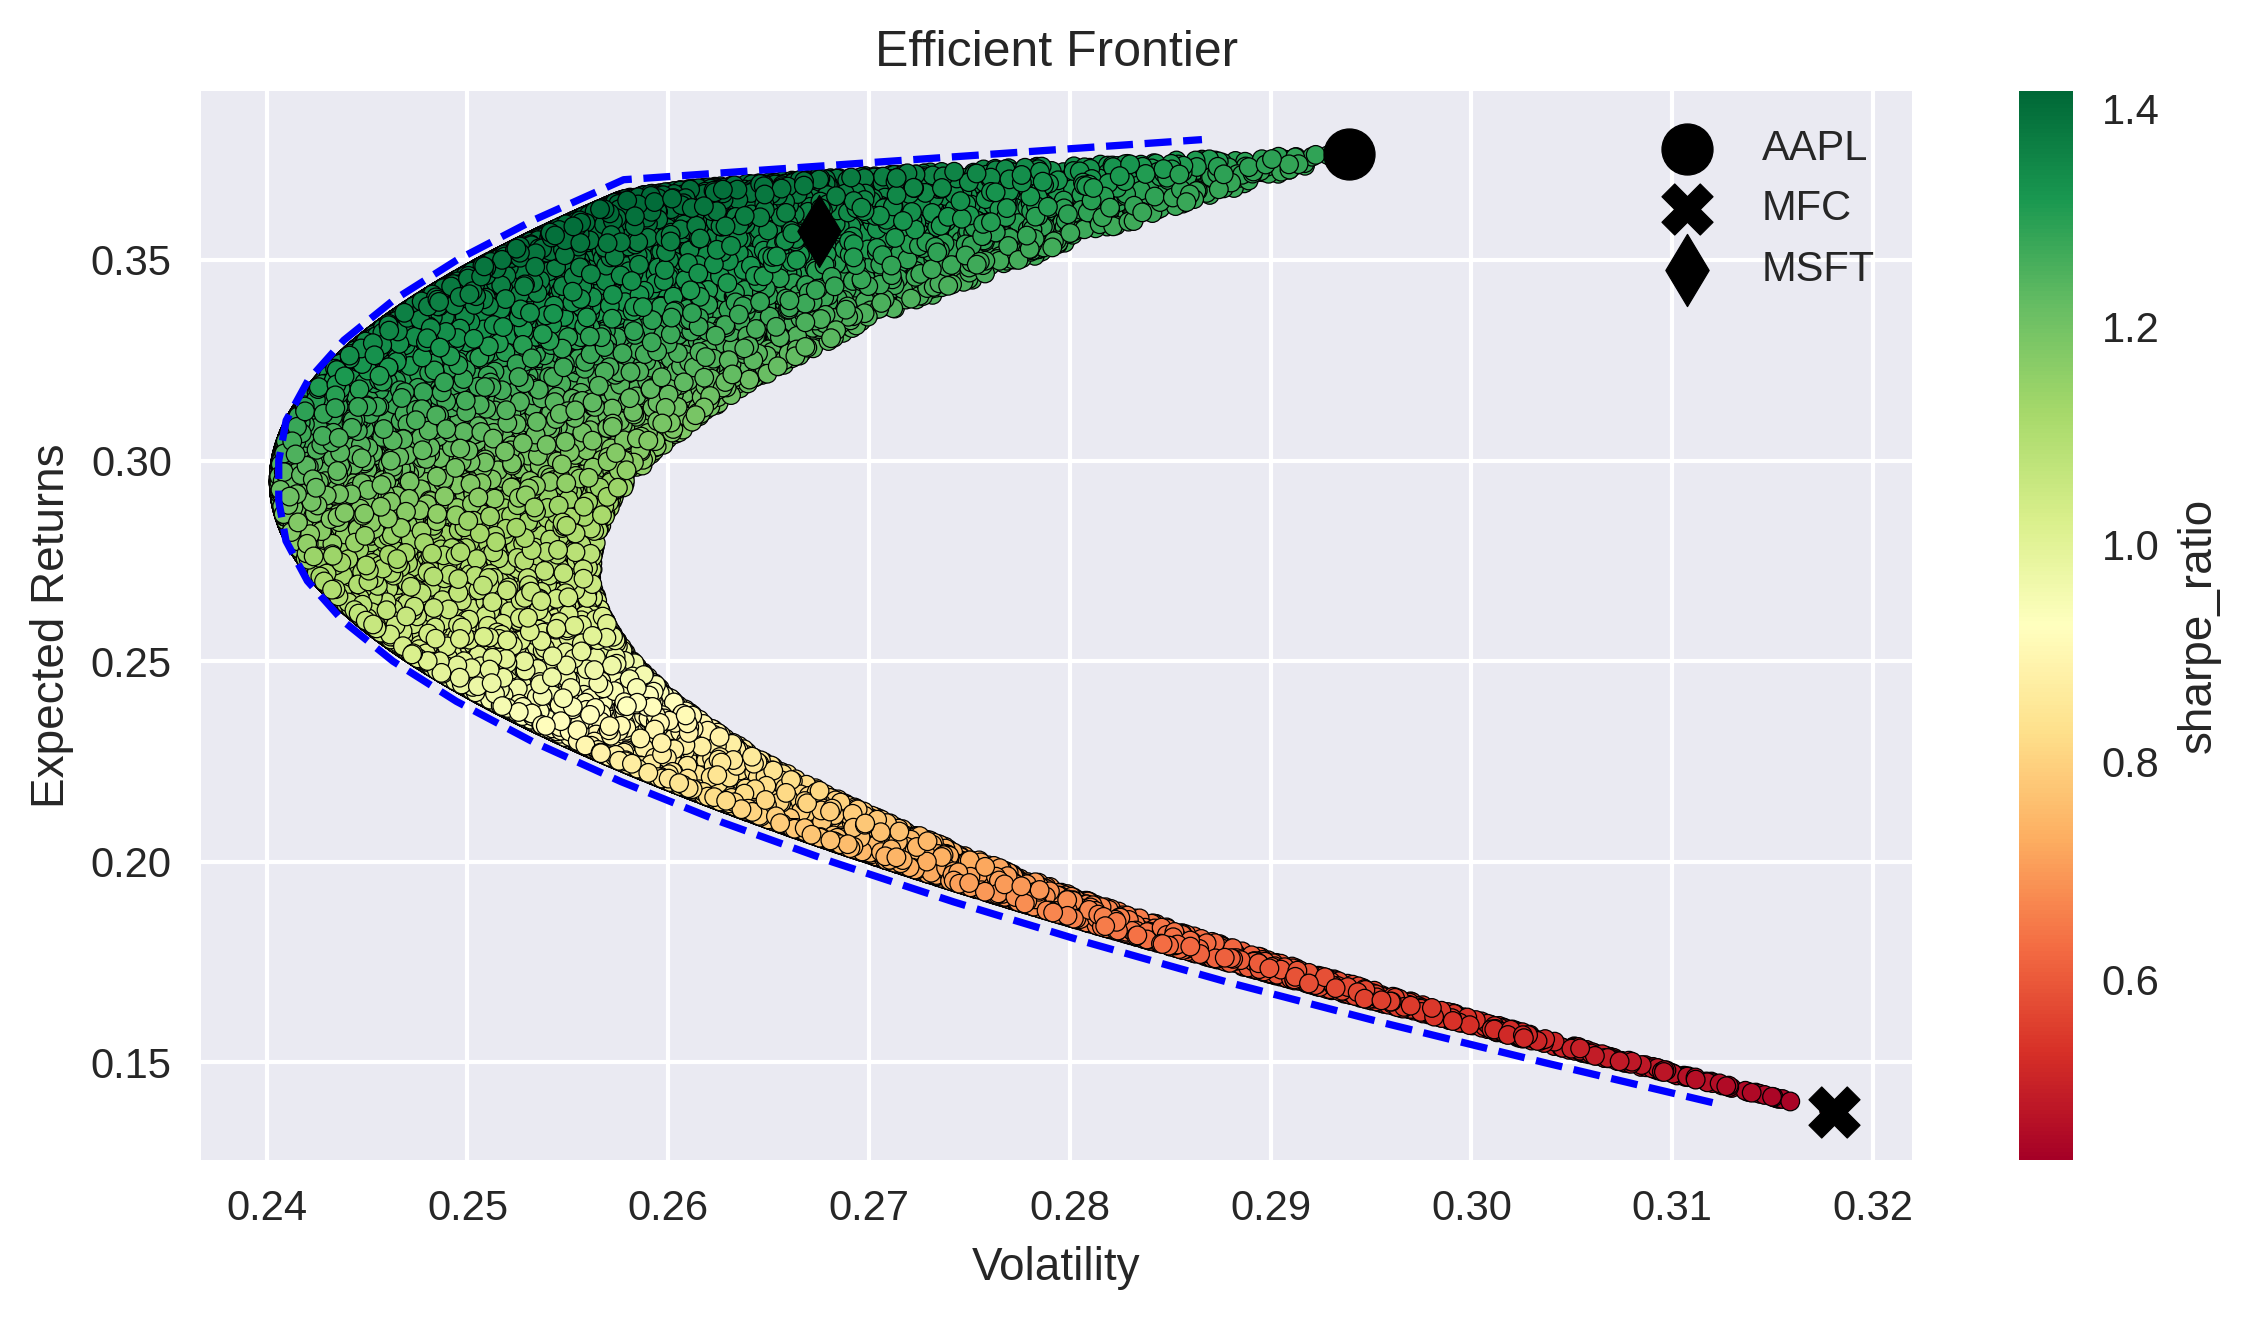

In [ ]:
MARKS = ['o', 'X', 'd', '*', '+']

fig, ax = plt.subplots()
# plot dots representing the simulated portfolios
portf_results_df.plot(kind='scatter', x='volatility',
                      y='returns', c='sharpe_ratio', # color the by the value of the Sharpe ratio
                      cmap='RdYlGn', edgecolors='black',
                      ax=ax)
# add labels
ax.set(xlabel='Volatility',
       ylabel='Expected Returns',
       title='Efficient Frontier')

# plot the approximated Efficient Frontier
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')

# plot the individual assets
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=MARKS[asset_index],
               s=150,
               color='black',
               label=user_stock_codes[asset_index])
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

Maximum Sharpe Ratio portfolio ----
Performance
returns: 33.42% volatility: 20.24% sharpe_ratio: 165.11% 
Weights
MFC: 62.03% MSFT: 37.17% NU: 0.20% NVDA: 0.60% 

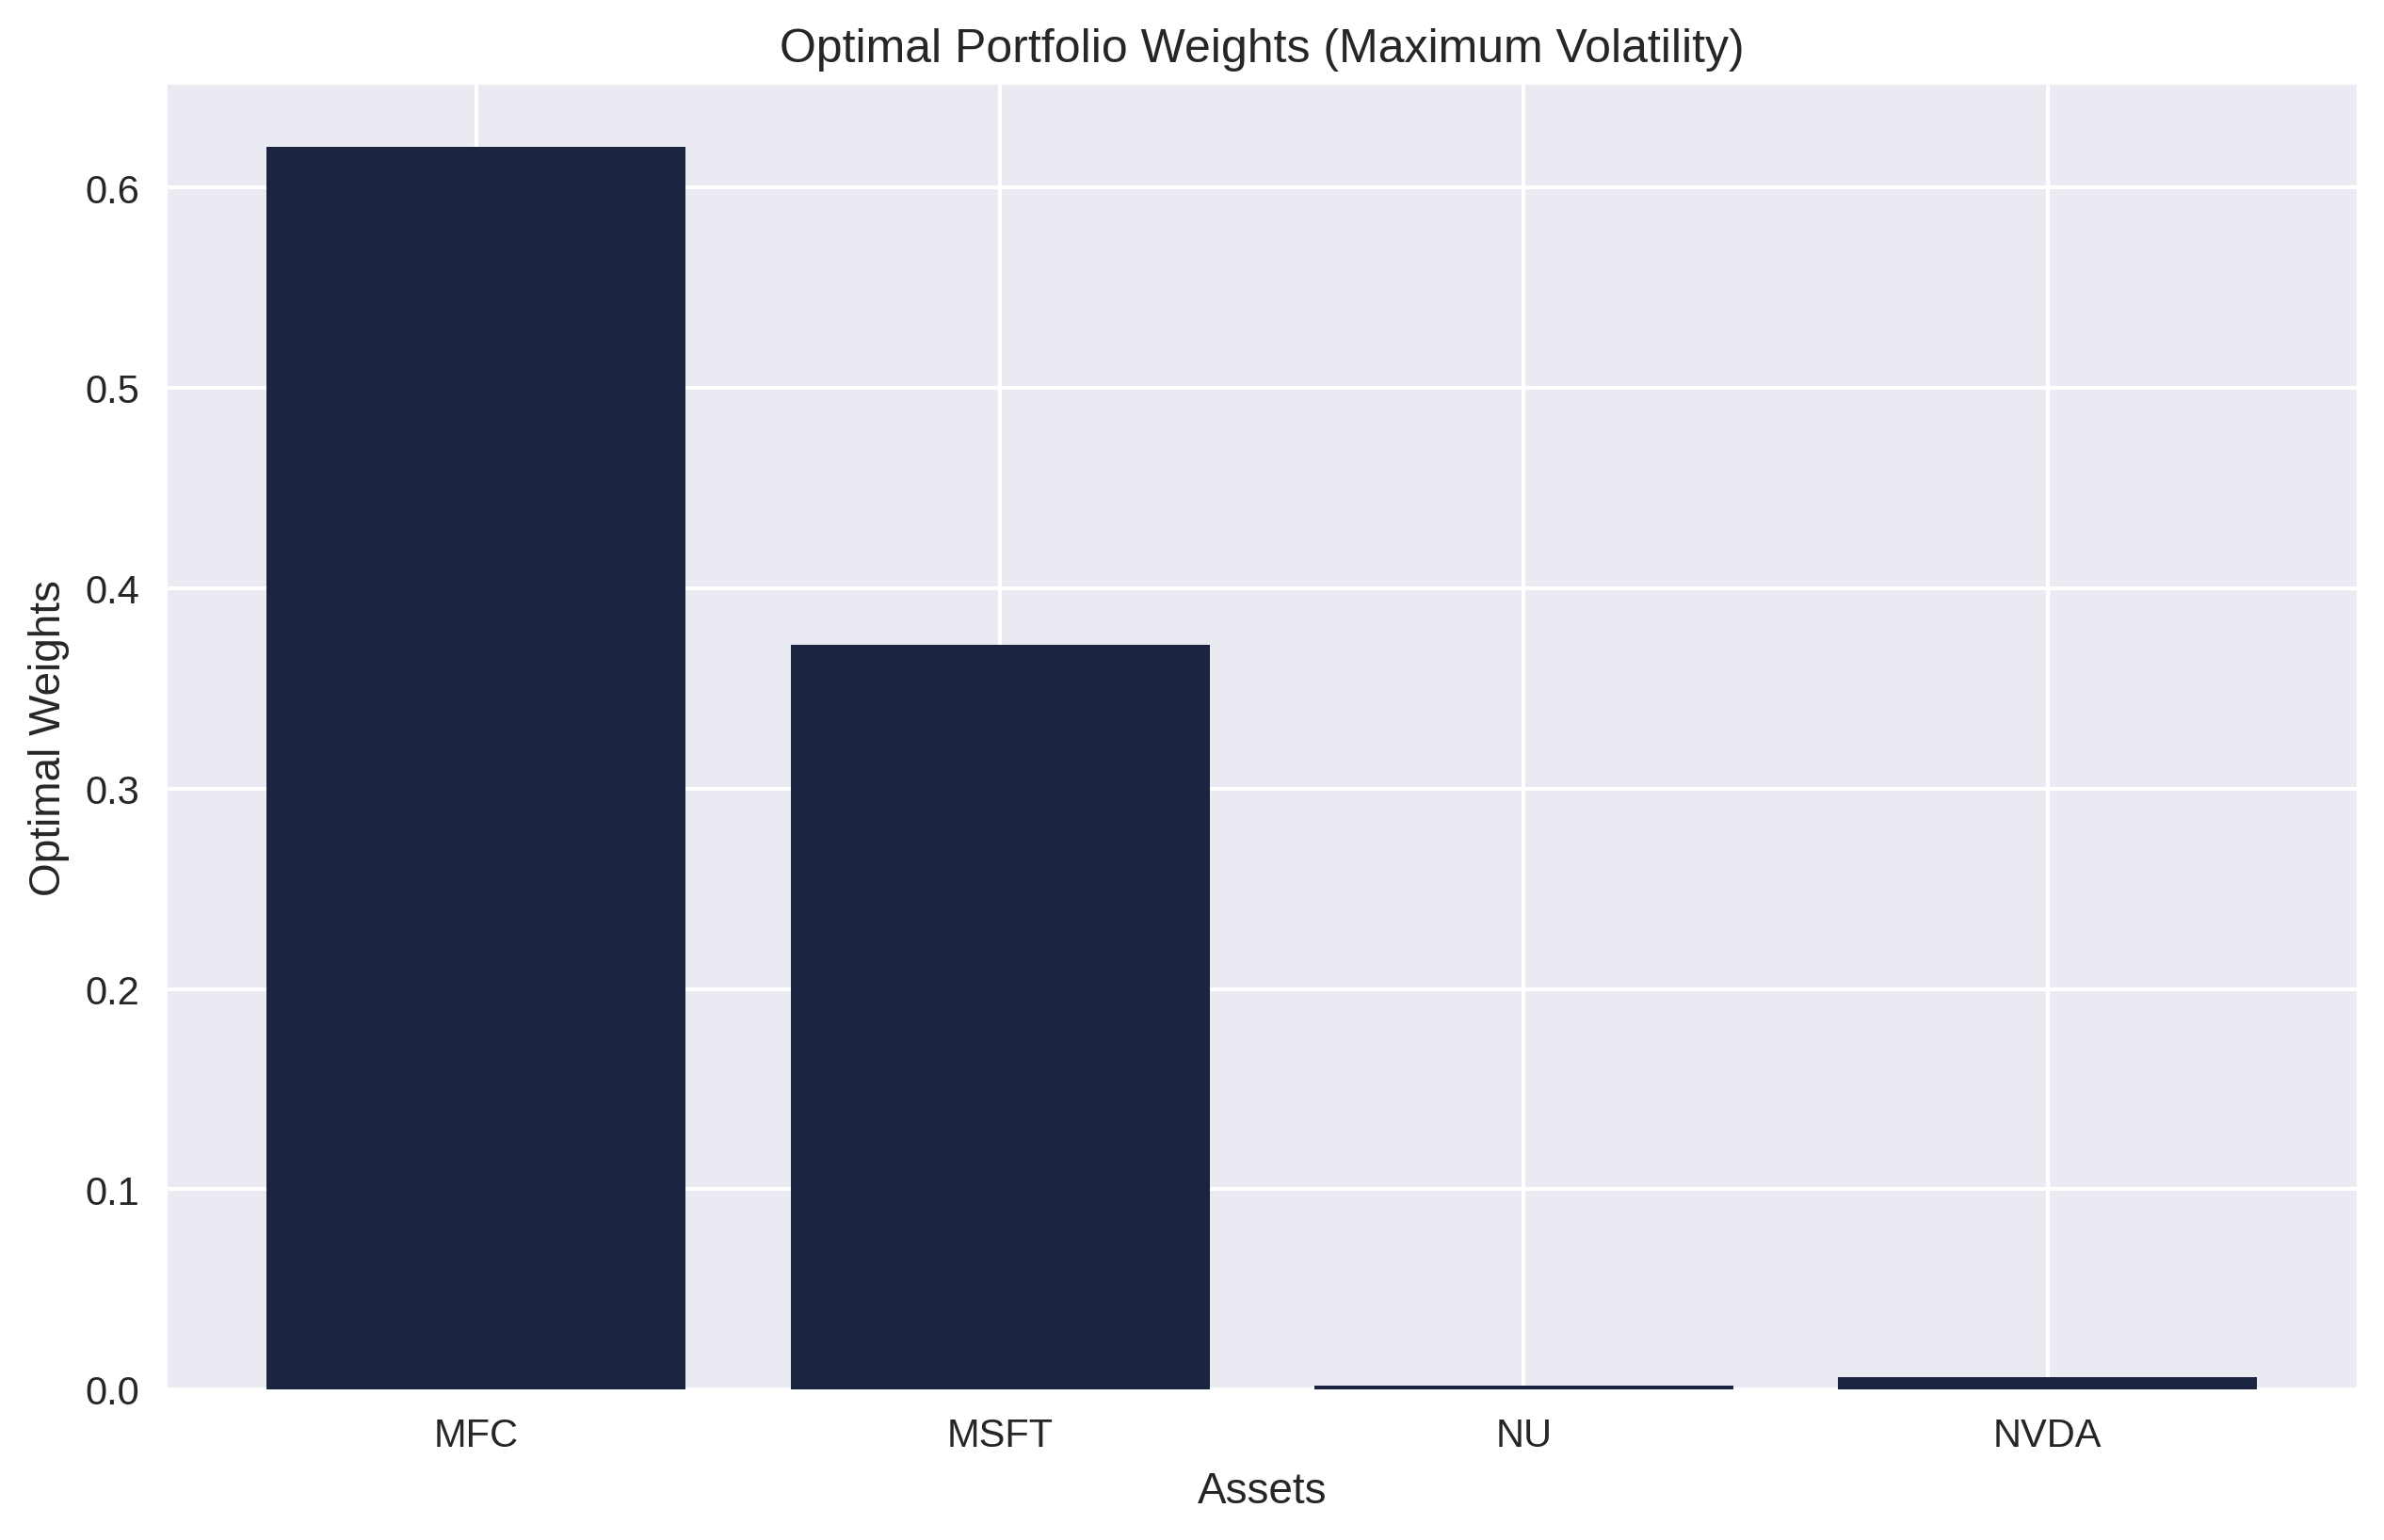

In [ ]:
#investigate the constituents of these portfolios
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="")
print('\nWeights')
for x, y in zip(user_stock_codes, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="")

plt.figure(figsize=(10, 6))
plt.bar(user_stock_codes, weights[np.argmax(portf_results_df.sharpe_ratio)])

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights (Maximum Volatility)')

plt.show()

Minimum Volatility portfolio ----
Performance
returns: 30.19% volatility: 19.24% sharpe_ratio: 156.88% 
Weights
MFC: 98.33% MSFT: 0.33% NU: 1.15% NVDA: 0.19% 

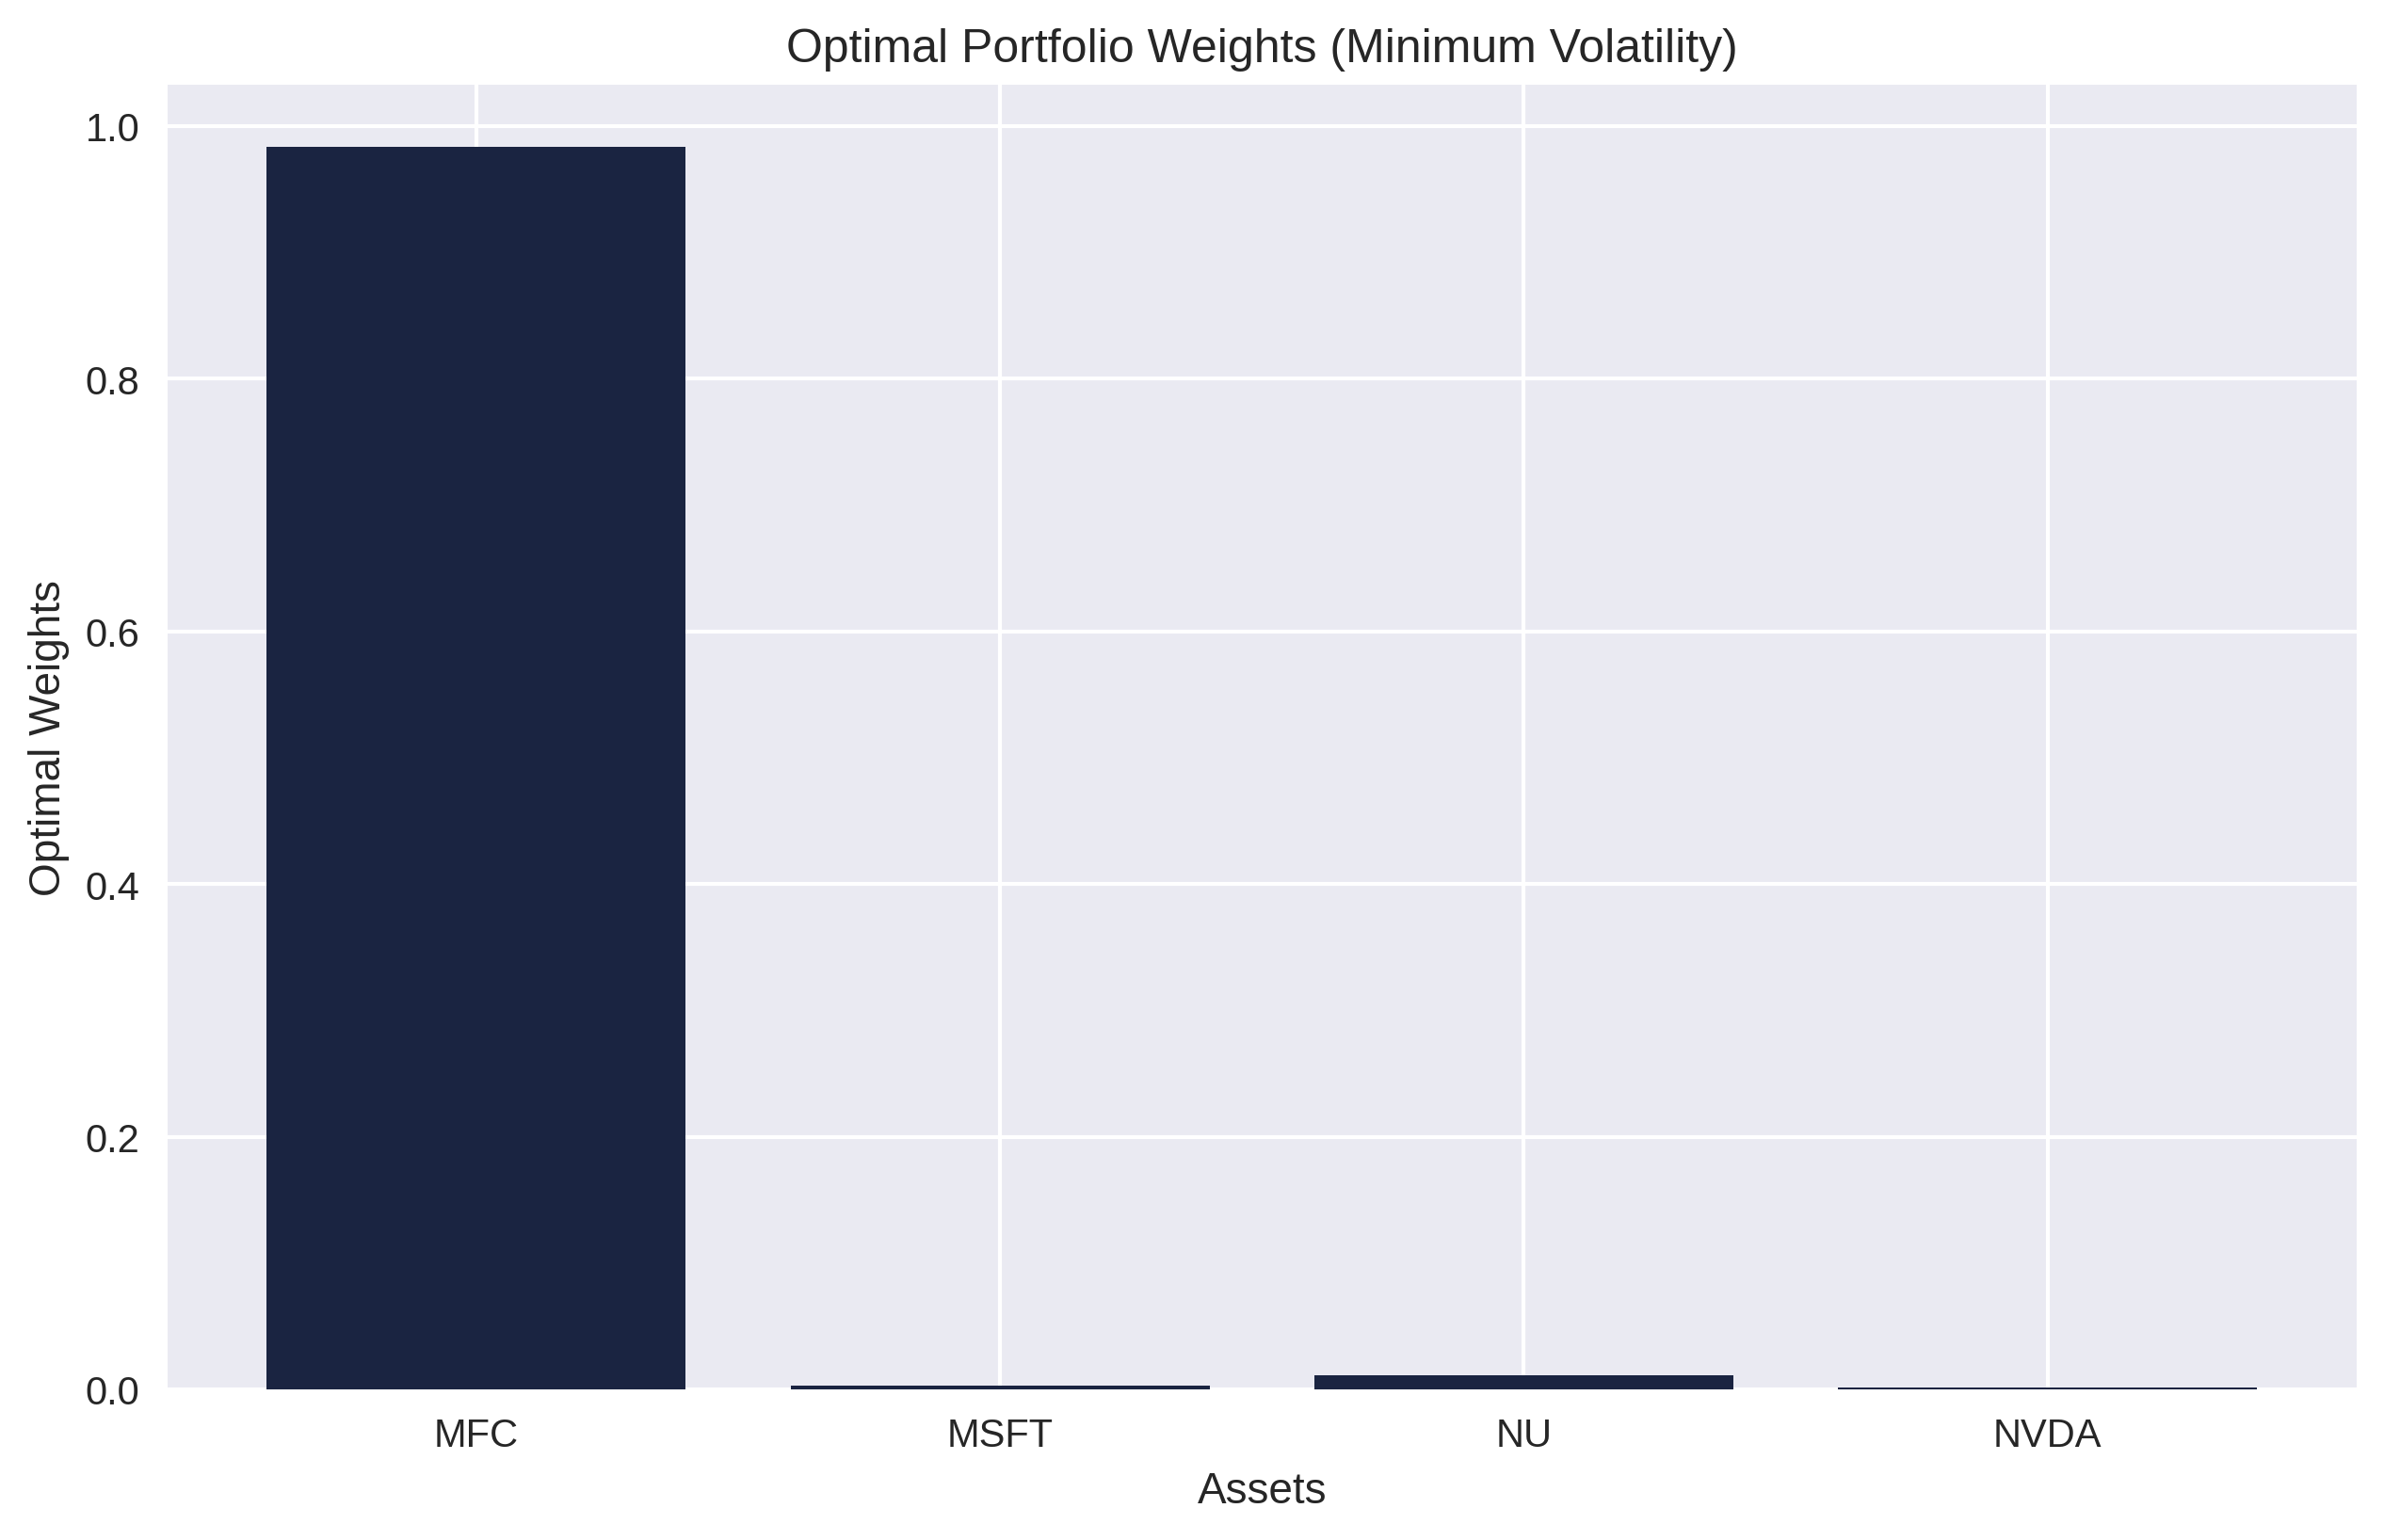

In [ ]:
print('Minimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="")
print('\nWeights')
for x, y in zip(user_stock_codes, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="")

plt.figure(figsize=(10, 6))
plt.bar(user_stock_codes, weights[np.argmin(portf_results_df.volatility)])

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights (Minimum Volatility)')

plt.show()


# Portfolio Optimization: The Black-Litterman Allocation Method

At its core, the Black-Litterman model computes a weighted average of the prior estimates of returns and particular views held by the investor for each asset. The weighting is dictated by the confidence levels given by the investor for each of his views, which allows for a more personalized investment strategy.

In [ ]:
user_stock_codes

['AAPL', 'MFC', 'MSFT']

In [ ]:
import yfinance as yf

# Define a list of stock tickers
tickers = user_stock_codes
tickers

# Retrieve market cap data from Yahoo Finance
for ticker in tickers:
    stock = yf.Ticker(ticker)
    market_cap = stock.info["marketCap"]
    print(f"Ticker: {ticker}, Market Cap: {market_cap}")

Ticker: AAPL, Market Cap: 2614313615360
Ticker: MFC, Market Cap: 42452631552
Ticker: MSFT, Market Cap: 2935316545536


In [ ]:

market_prices = yf.download("SPY", start='2016-01-01', end='2021-12-31')["Adj Close"]
market_prices.head()

[*********************100%%**********************]  1 of 1 completed


Date
2016-01-04    174.043198
2016-01-05    174.337570
2016-01-06    172.138474
2016-01-07    168.008575
2016-01-08    166.164444
Name: Adj Close, dtype: float64

In [ ]:
!pip install PyPortfolioOpt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pypfopt
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting


S = risk_models.CovarianceShrinkage(adj_close).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta


4.8892635247476095

In [ ]:

mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'AAPL': 2614313615360, 'MFC': 42452631552, 'MSFT': 2935316545536}

In [ ]:

market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

Ticker
AAPL    0.355943
MFC     0.204245
MSFT    0.328708
dtype: float64

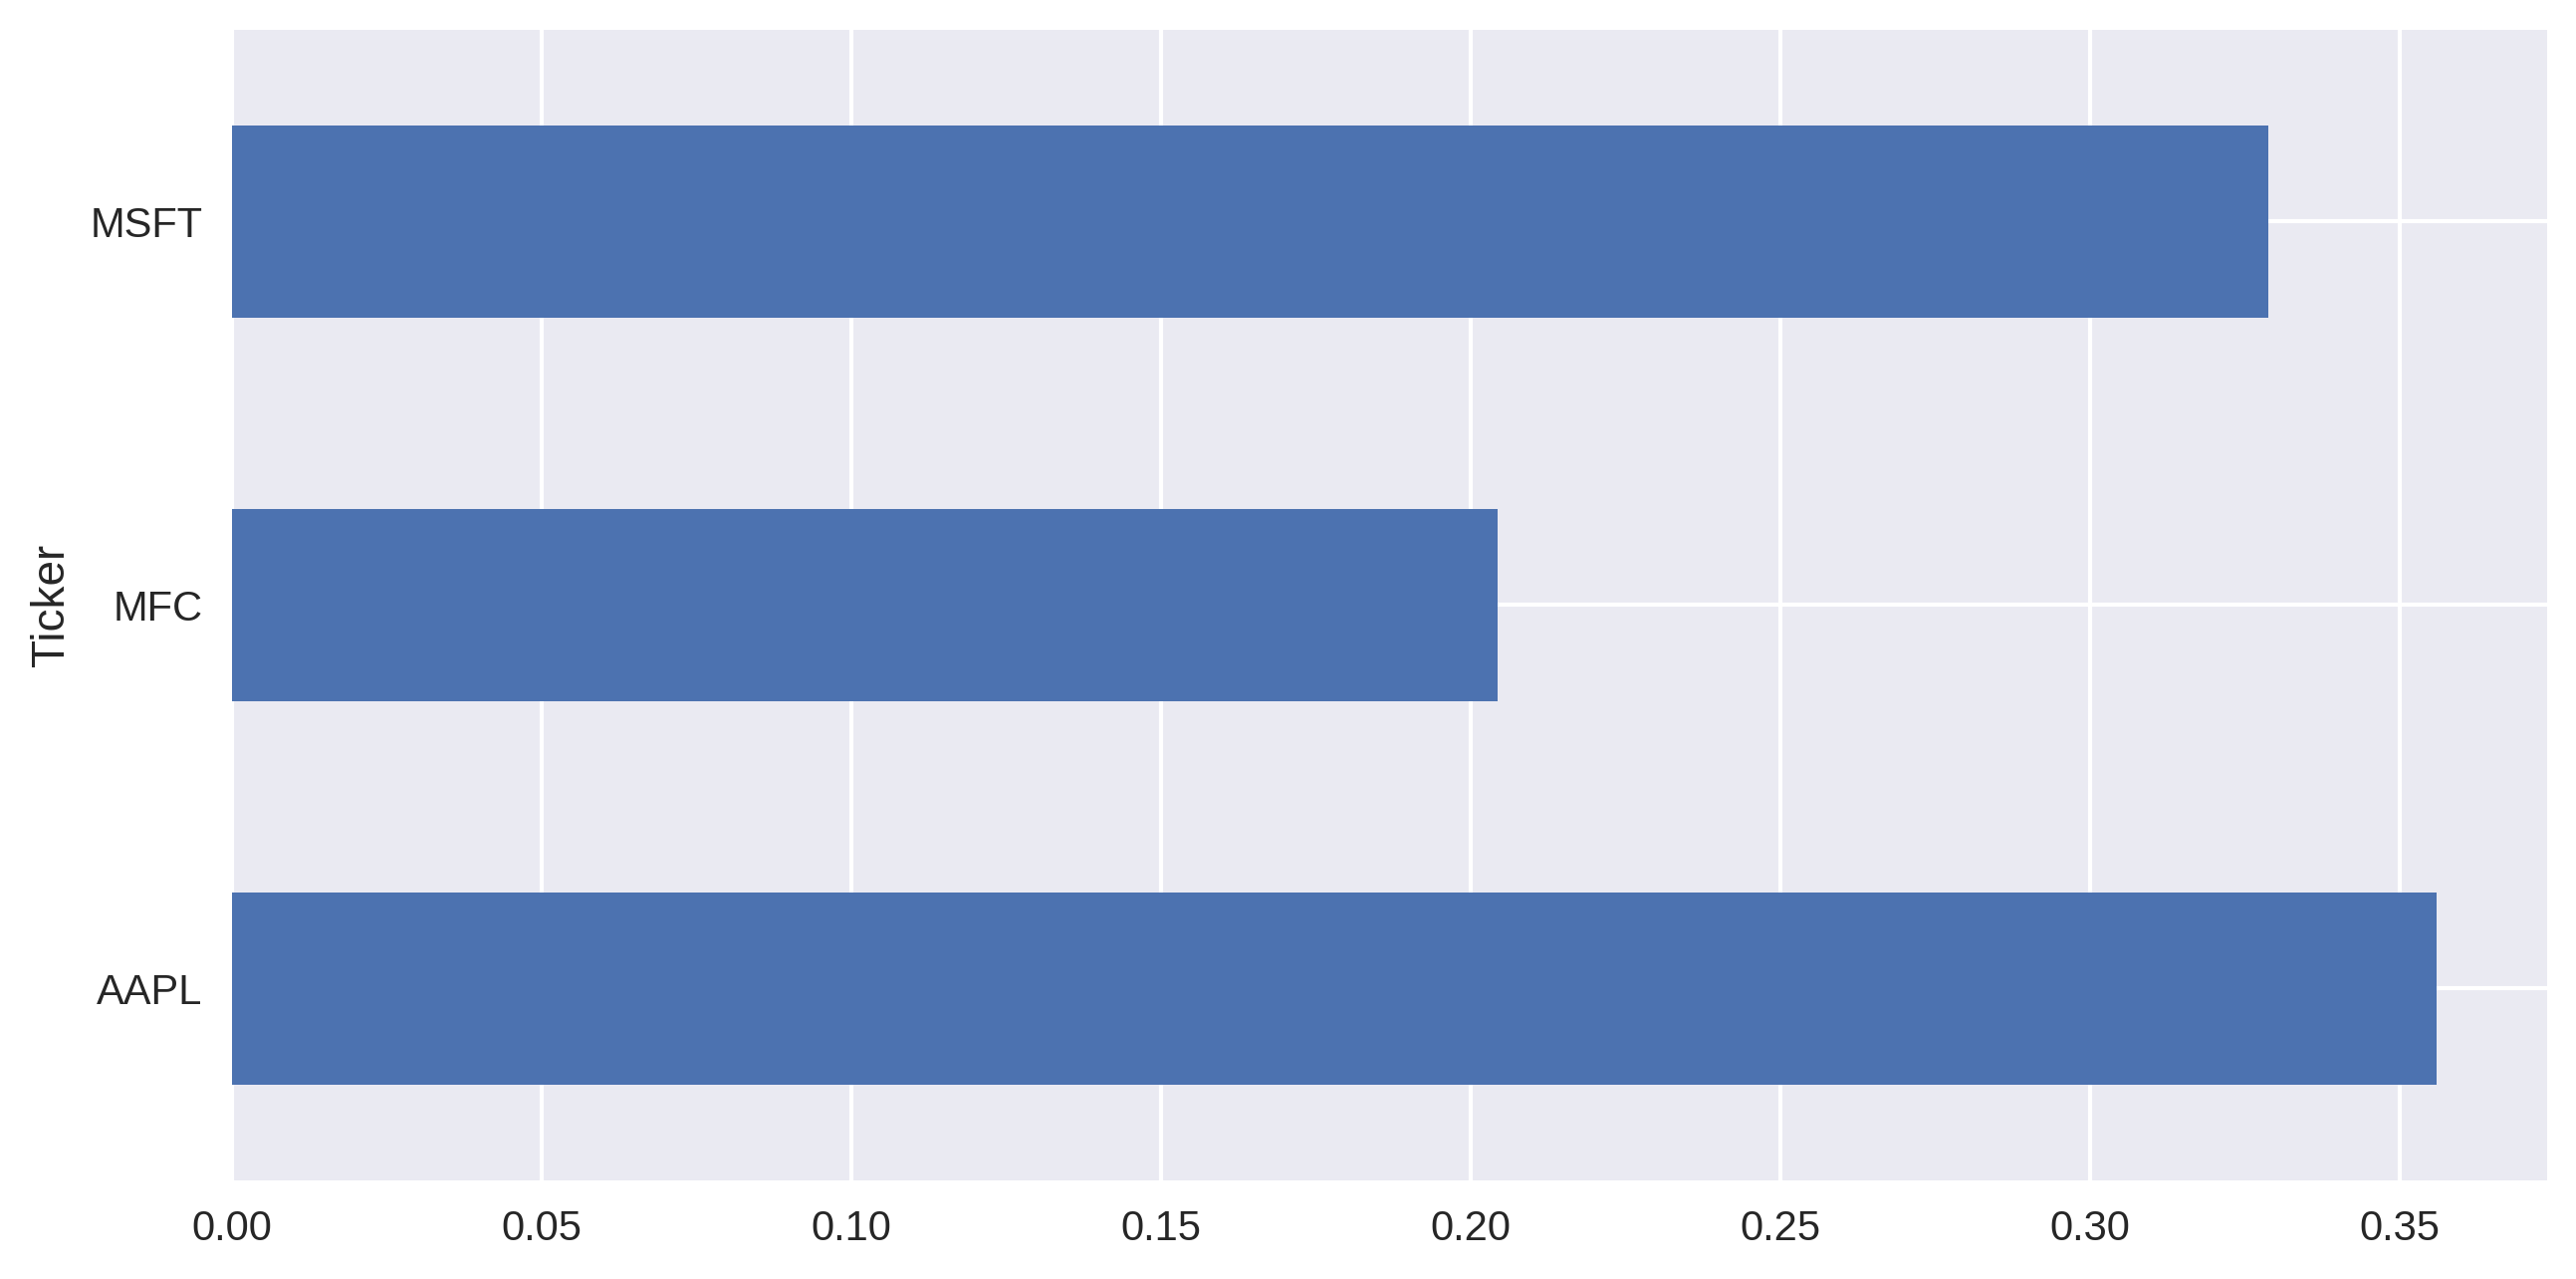

In [ ]:

market_prior.plot.barh(figsize=(10,5));

In [ ]:
viewdict = {
    "AAPL": 0.05,
    "MFC": 0.10,
    "MSFT": 0.20,


}



In [ ]:
# Providing confidence levels
# Closer to 0.0 = Low confidence
# Closer to 1.0 = High confidence
confidences = [0.3,
               0.3,
               0.2]

In [ ]:
# Creating model

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)


In [ ]:

# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

Ticker
AAPL    0.252444
MFC     0.142048
MSFT    0.254598
dtype: float64

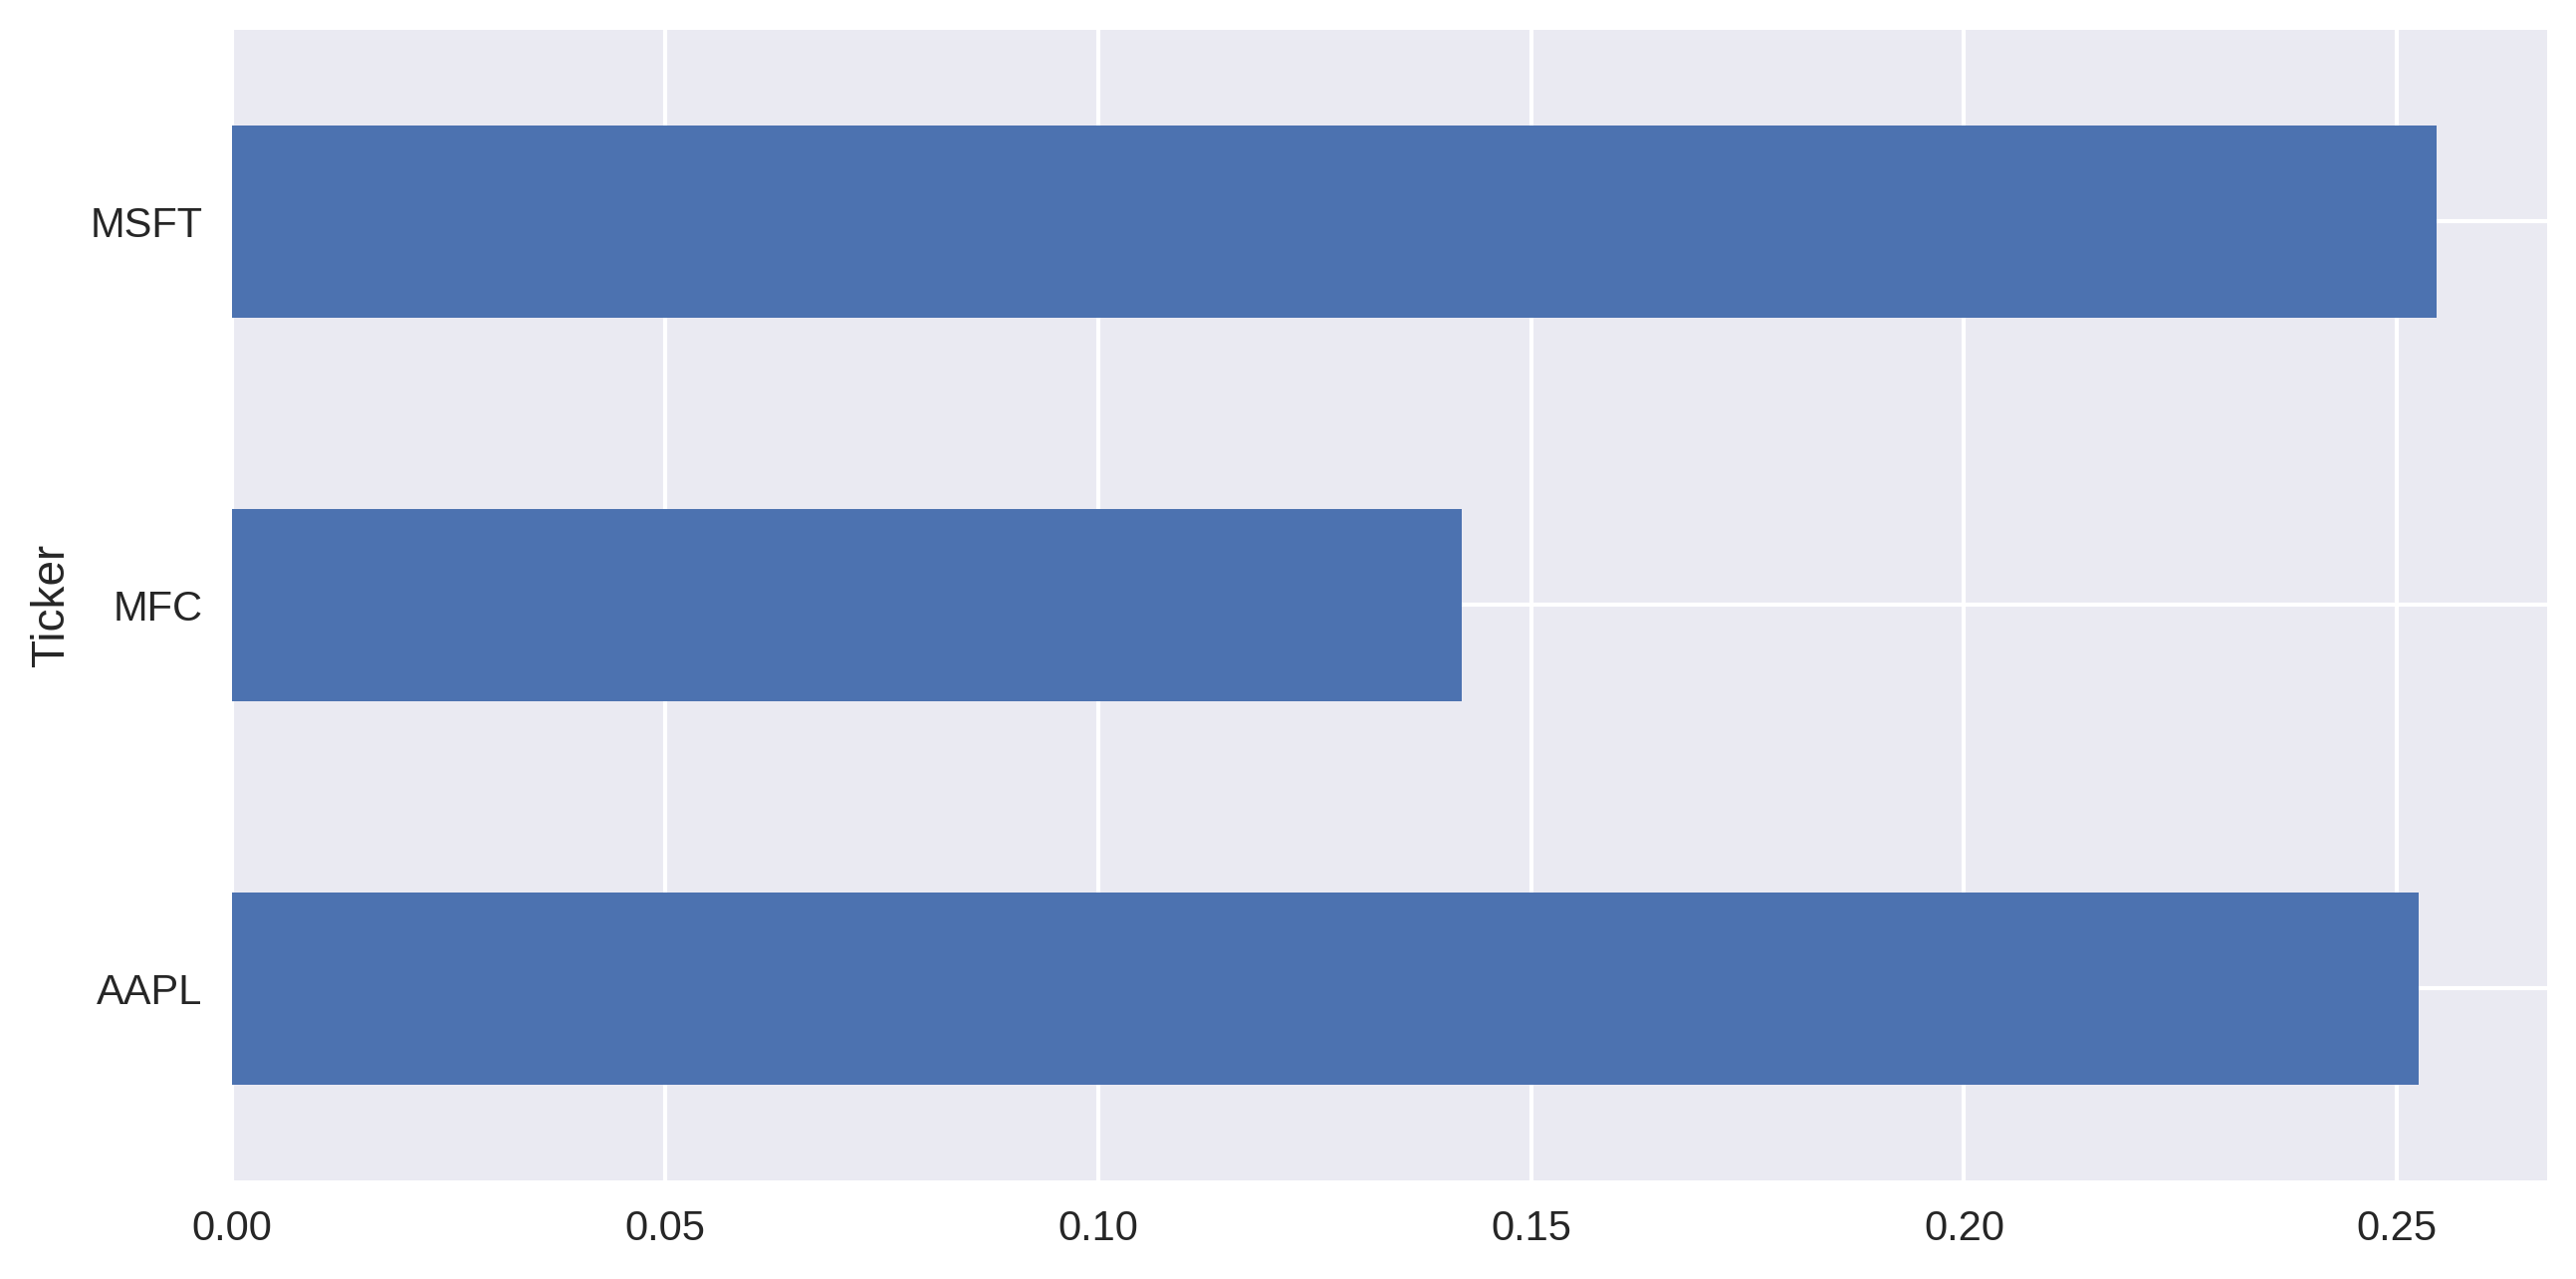

In [ ]:

ret_bl.plot.barh(figsize=(10,5));

In [ ]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AAPL,0.355943,0.252444,0.05
MFC,0.204245,0.142048,0.10
MSFT,0.328708,0.254598,0.20


In [ ]:

from pypfopt import EfficientFrontier, objective_functions

In [ ]:

S_bl = bl.bl_cov()
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.39869), ('MFC', 0.19285), ('MSFT', 0.40845)])

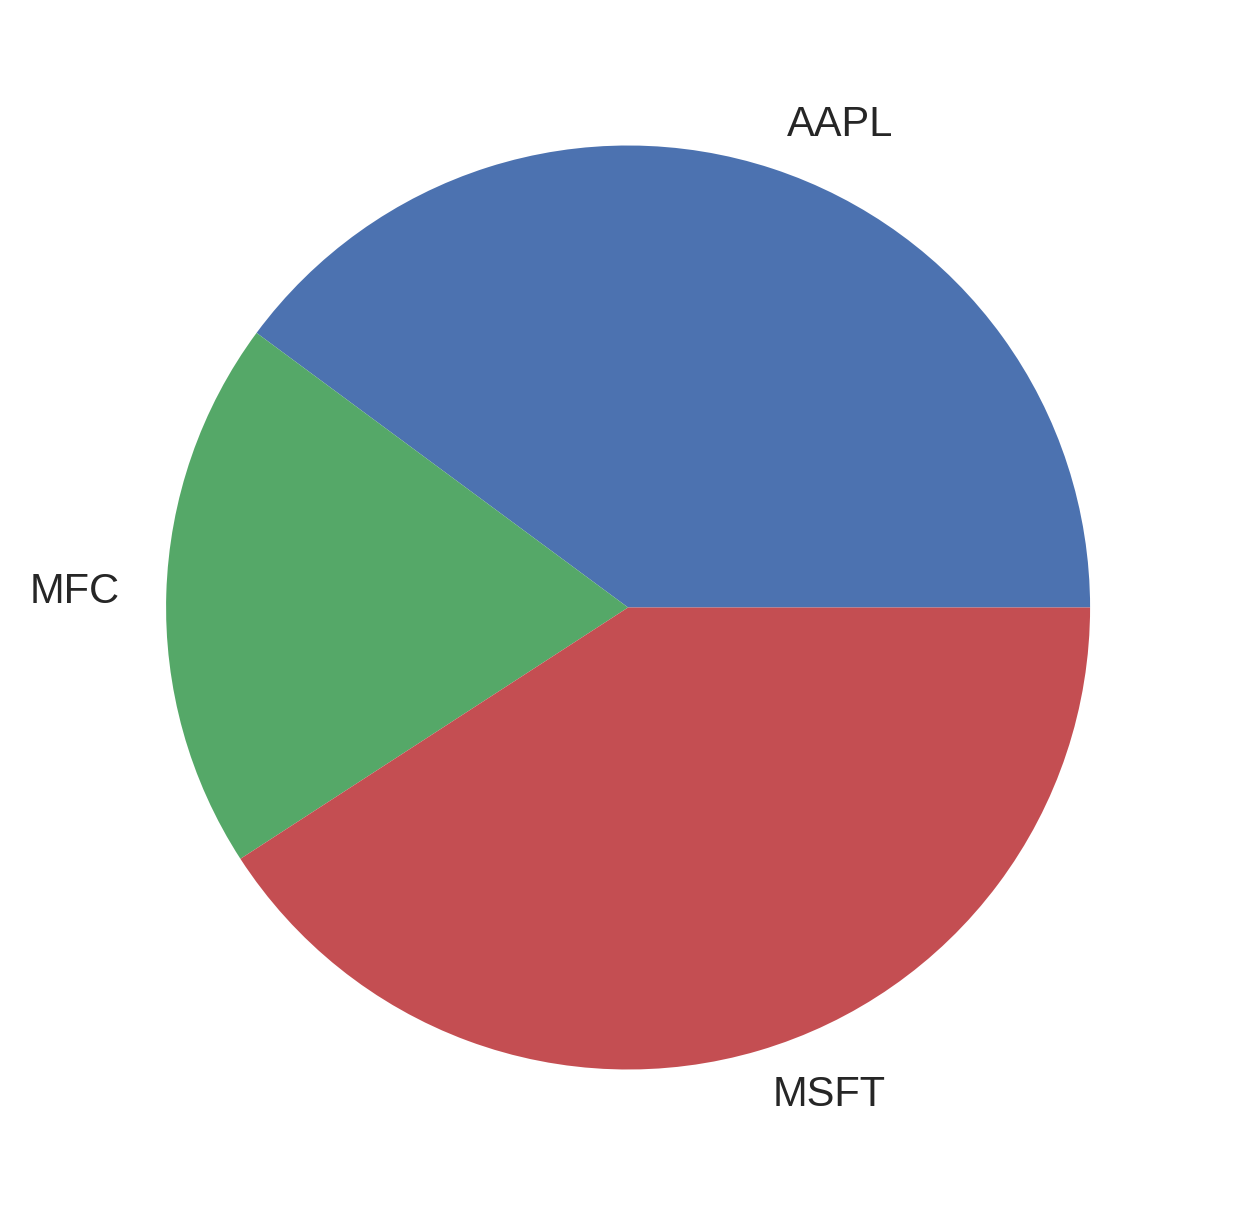

In [ ]:


pd.Series(weights).plot.pie(figsize=(5,5));

In [ ]:
#Input the investment Capital and calculate the no. of stocks to purchase base on the portfolio
from pypfopt import DiscreteAllocation
Capital = input("You Investment Capital (USD)?")
data_today = yf.download(user_stock_codes, period="max")
price_today = data_today['Adj Close']
da = DiscreteAllocation(weights, price_today.iloc[-1], total_portfolio_value=int(Capital))
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

You Investment Capital (USD)?10000


[*********************100%%**********************]  3 of 3 completed

Leftover: $31.09


{'AAPL': 24, 'MFC': 83, 'MSFT': 10}